# Phylogenetic trees

In [1]:
import json
import pandas as pd
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
samples_dict = json.load( open( "../../../cases_ids.json", "rb" ) )

In [3]:
def prepare_table(t1_df,t2_df,snv):
    df1 = t1_df[['#CHROM','POS','REF','ALT','t_CCF','mut_type']]
    df1.drop_duplicates(subset=['#CHROM','POS','REF','ALT'],keep='first',inplace=True)
    df2 = t2_df[['#CHROM','POS','REF','ALT','t_CCF','mut_type']]
    df2.drop_duplicates(subset=['#CHROM','POS','REF','ALT'],keep='first',inplace=True)
    t1_t2_df = pd.merge(df1,df2,on=['#CHROM','POS','REF','ALT','mut_type'], how='outer',indicator='tumor', suffixes=('_t1','_t2'))
    t1_t2_df['tumor'] = t1_t2_df['tumor'].replace('left_only','T1')
    t1_t2_df['tumor'] = t1_t2_df['tumor'].replace('right_only','T2')
    if snv == True:
        t1_t2_df = t1_t2_df[t1_t2_df['mut_type']=='snv']
    return t1_t2_df

In [4]:
def plot_tree(t1_t2_df,title,labels=None):
    plt.figure(figsize=(2,5)) 
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax1 = plt.axes(frameon=False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)

    muts_both = len(t1_t2_df[t1_t2_df['tumor']=='both'])
    muts_t1 = len(t1_t2_df[t1_t2_df['tumor']=='T1'])
    muts_t2 = len(t1_t2_df[t1_t2_df['tumor']=='T2'])
    print('Both:')
    display(t1_t2_df[t1_t2_df['tumor']=='both'].groupby('mut_type').count())
    print('T1:')
    display(t1_t2_df[t1_t2_df['tumor']=='T1'].groupby('mut_type').count())
    print('T2:')
    display(t1_t2_df[t1_t2_df['tumor']=='T2'].groupby('mut_type').count())
    
    if labels !=None:
        tumor1 = labels[0]
        tumor2 = labels[1]
    else:
        tumor1 = 'Tumor 1'
        tumor2 = 'Tumor 2'

    plt.plot([0,-1],[-muts_both,-muts_both-muts_t1],color='mediumseagreen',linewidth=5) #Line T1
    plt.plot([0,1],[-muts_both,-muts_both-muts_t2],color='lightcoral',linewidth=5) #Line T2
    plt.plot([0,0],[0,-muts_both],color='darkorange',linewidth=5) #Line both
    plt.text(x=-1.3,y=-(muts_both+muts_t1)*1.1,s=tumor1,fontsize=12) #Text Tumor 1
    plt.text(x=1,y=-(muts_both+muts_t2)*1.1,s=tumor2,fontsize=12) #Text Tumor 2
    plt.text(x=0.1,y=-(muts_both)/2,s=muts_both,fontsize=12) # Number of mutations both
    plt.text(x=-0.9,y=-(muts_both+muts_t1/2),s=muts_t1,fontsize=12,ha='center') #Number of mutations T1
    plt.text(x=0.9,y=-(muts_both+muts_t2/2),s=muts_t2,fontsize=12,ha='center') #Number of mutations T2
    plt.title(title,fontsize=14)

In [5]:
#change at the end
# root_out = './output/'
root_out = '/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'
pt_to_case = {'case1':'pt2','case2':'pt3','case3':'pt1','case4':'pt8'}

### Trees only with snvs

case1
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1259,1259,1259,1259,1259,0,1259


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,2231,2231,2231,2231,0,2231,2231


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


case2
Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,5,5,5,5,5,5,5


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,106,106,106,106,106,0,106


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,89,89,89,89,0,89,89


case3


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1251,1251,1251,1251,1251,0,1251


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1578,1578,1578,1578,0,1578,1578


case4
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1969,1969,1969,1969,1969,0,1969


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,270,270,270,270,0,270,270


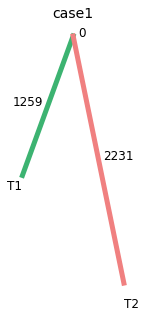

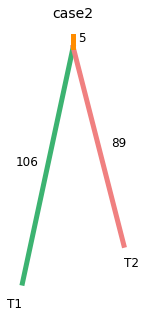

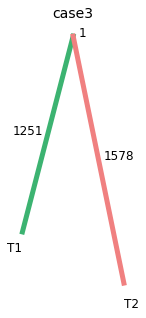

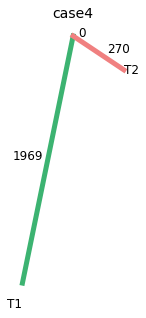

In [6]:
for case in samples_dict.keys():
    print(case)
    pt = pt_to_case[case]
    normal_id = samples_dict[case]['normal']
    tumor_id = samples_dict[case]['tumor1']

    t1_df = pd.read_csv(root_out+pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    

    tumor_id = samples_dict[case]['tumor2']

    t2_df = pd.read_csv(root_out+pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    
    t1_df = t1_df[t1_df['clonal']==True]
    t2_df = t2_df[t2_df['clonal']==True]
            
    t1_t2_df = prepare_table(t1_df,t2_df,snv=True)
    title = case

    labels = ['T1','T2']

    plot_tree(t1_t2_df,title,labels)

### Trees with snv, indels and mnv

case1
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,414,414,414,414,414,0,414
mnv,8,8,8,8,8,0,8
snv,1259,1259,1259,1259,1259,0,1259


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,376,376,376,376,0,376,376
mnv,15,15,15,15,0,15,15
snv,2231,2231,2231,2231,0,2231,2231


case2
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,2,2,2,2,2,2,2
snv,5,5,5,5,5,5,5


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,73,73,73,73,73,0,73
snv,106,106,106,106,106,0,106


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,61,61,61,61,0,61,61
snv,89,89,89,89,0,89,89


case3


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,511,511,511,511,511,0,511
mnv,5,5,5,5,5,0,5
snv,1251,1251,1251,1251,1251,0,1251


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,318,318,318,318,0,318,318
mnv,10,10,10,10,0,10,10
snv,1578,1578,1578,1578,0,1578,1578


case4
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,2549,2549,2549,2549,2549,0,2549
mnv,17,17,17,17,17,0,17
snv,1969,1969,1969,1969,1969,0,1969


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,61,61,61,61,0,61,61
mnv,1,1,1,1,0,1,1
snv,270,270,270,270,0,270,270


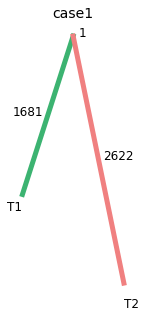

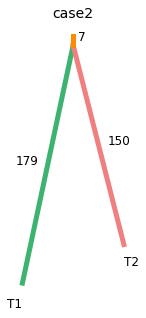

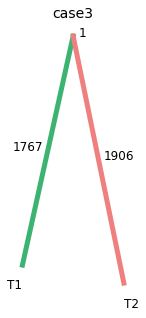

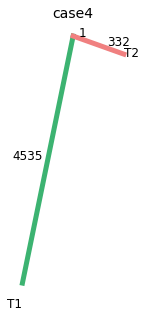

In [7]:
for case in samples_dict.keys():
    print(case)
    
    pt = pt_to_case[case]
    normal_id = samples_dict[case]['normal']
    tumor_id = samples_dict[case]['tumor1']

    t1_df = pd.read_csv(root_out+pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    

    tumor_id = samples_dict[case]['tumor2']

    t2_df = pd.read_csv(root_out+pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    
    t1_df = t1_df[t1_df['clonal']==True]
    t2_df = t2_df[t2_df['clonal']==True]
            
    t1_t2_df = prepare_table(t1_df,t2_df,snv=False)
    title = case

    labels = ['T1','T2']
    plot_tree(t1_t2_df,title,labels)